In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('bigdatamart_Train.csv') #loading the train set
df2=pd.read_csv('bigdatamart_Test.csv')  #loading the test set

In [4]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
df1.shape

(8523, 12)

In [8]:
df2.shape

(5681, 11)

### Observation:-
1. There are 8523 row and 12 columns in train dataset. while 5681 row and 11 columns in test data set, 
2. one column Item_Outlet_Sales is extra in train dataset because this is our target variable.


In [9]:
# Checking Null values in Train Set
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Text(0.5, 1.0, 'Null Value Heat Map')

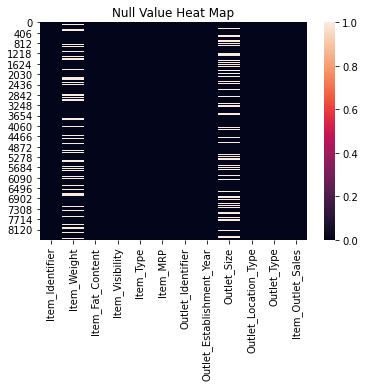

In [10]:
sns.heatmap(df1.isnull())
plt.title("Null Value Heat Map")

### Observation:
Null values exist in train dataset.

In [11]:
# Checking Null values in Test Set
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Text(0.5, 1.0, 'Null Value Heat Map')

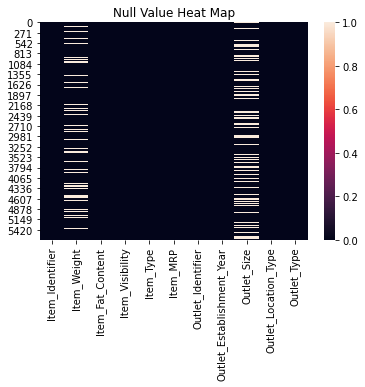

In [12]:
sns.heatmap(df2.isnull())
plt.title("Null Value Heat Map")

### Observation:- 

Null values exist in test data set.

Item_Weight Skewness 0.0824262091221237


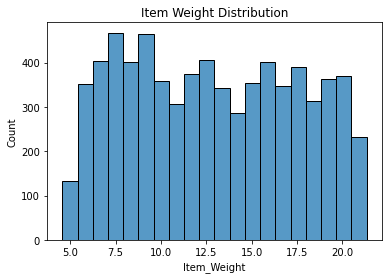

In [13]:
print("Item_Weight Skewness", df1['Item_Weight'].skew())
sns.histplot(df1['Item_Weight'])
plt.title("Item Weight Distribution")
plt.show()

### Observation:-
Data has not skewness, hence we can apply any method(mean or median) to impute missing values.

### Remove Null values from Item_Weight variable.

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="mean")

df1["Item_Weight"]=imp.fit_transform(df1["Item_Weight"].values.reshape(-1,1))
df2["Item_Weight"]=imp.fit_transform(df2["Item_Weight"].values.reshape(-1,1))

In [15]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation:-
 1. Null values for Item_Weight has moved for both data set.
 2. Outlet_Size variable stil has null values, total null values in this column are very much, will replace missing values with mode of the column.

In [17]:
#corr_matrix = df1.corr()
#corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
#df1.var()

In [18]:
#Filling the Null values in 'Outlet_Size' column with "Unknown"
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0], inplace = True)

df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


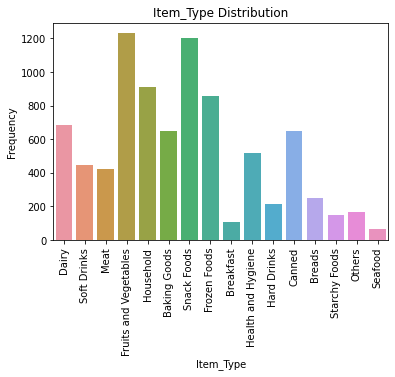

In [20]:
sns.countplot(df1['Item_Type'])
plt.title('Item_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
plt.show()

In [21]:
pd.set_option('display.max_row',None)


In [22]:
# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]
  
  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [23]:
df1['Item_Type']=df1[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
df2['Item_Type']=df2[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

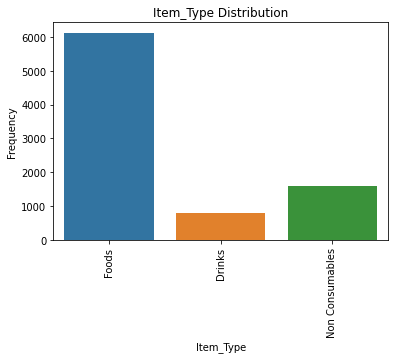

In [24]:
sns.countplot(df1['Item_Type'])
plt.title('Item_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
plt.show()

### Observation:-
1. From above categorization, we found that maximum sale coming for Food Items.
2. We have converted all the item_types in 3 category, it will help us impute variable with 3 categorical values only 

### Check for unique values in other columns.


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

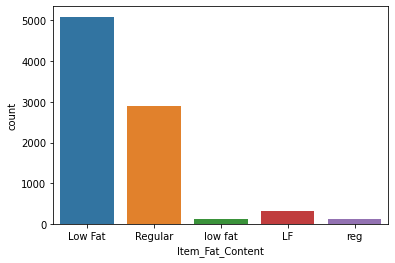

In [25]:
sns.countplot(df1['Item_Fat_Content'])

### Observation:-
1. There are multiple values having ambegious meaning, "Low Fat" has three different values Low Fat, LF and low fat, we will combane these values using in one. some nun consumable items also has low fat value, we will replace them with non-edible.

In [26]:
def item_fat(cols):
  fat=cols[0]
  type1=cols[1]
  
  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (type1=='Foods' or type1=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (type1=='Foods' or type1=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'

In [27]:
df1['Item_Fat_Content']=df1[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
df2['Item_Fat_Content']=df2[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

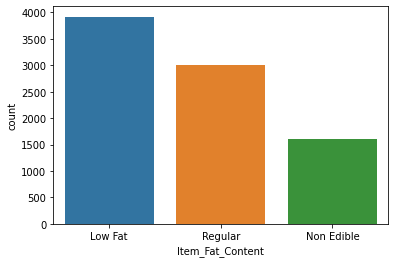

In [28]:
sns.countplot(df1['Item_Fat_Content'])

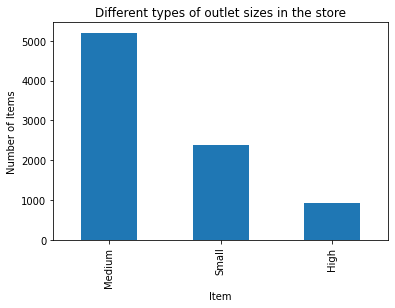

In [29]:
# we will analyze only the training set

df1['Outlet_Size'].value_counts(normalize = True)
df1['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

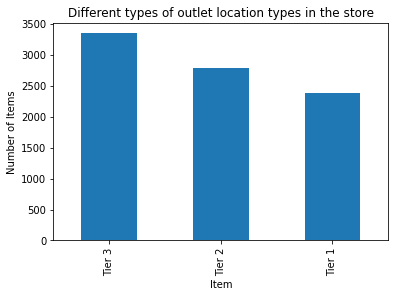

In [30]:
df1['Outlet_Location_Type'].value_counts(normalize = True)
df1['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

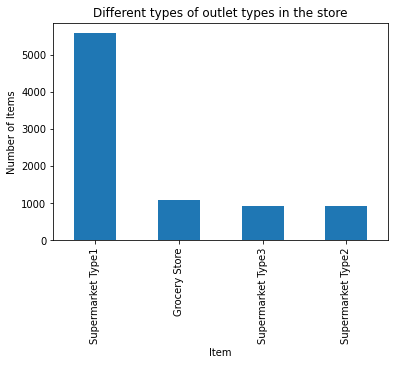

In [31]:
df1['Outlet_Type'].value_counts(normalize = True)
df1['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

### Check for Item visibility values.


In [32]:
df1['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
Name: Item_Visibility, dtype: int64

### Observation:-
1. Item Visibility has 526 0.0 value which was not detected by isnull check, because it was not a missing but float 0 value, 
2. We will replace it with the mean value of column.

In [33]:
df1['Item_Visibility'].mask(df1['Item_Visibility']== 0,df1['Item_Visibility'].mean(),inplace=True)
df2['Item_Visibility'].mask(df2['Item_Visibility']== 0,df2['Item_Visibility'].mean(),inplace=True)

In [34]:
df1['Item_Visibility'].value_counts().head()

0.066132    526
0.076975      3
0.107037      2
0.159165      2
0.112859      2
Name: Item_Visibility, dtype: int64

In [35]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Foods,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Foods,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non Edible,0.066132,Non Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
#Let's add a new feature that would have the number of years the outlet has been in operation till 2013. (This dataset is from 2013). 
def num_years(col):
    return 2013-col

df1['Years_of_Operation']=df1['Outlet_Establishment_Year'].apply(num_years)
df2['Years_of_Operation']=df2['Outlet_Establishment_Year'].apply(num_years)

In [37]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_Operation
0,FDA15,9.30,Low Fat,0.016047,Foods,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.066132,Foods,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Non Edible,0.066132,Non Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [38]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_of_Operation
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.048742,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


### Observation:- 
1. count for all the columns are same, means there is no missing value.
2. Mean and Median for all continuouse value column has no big diffirence. hence skewness not exists in this dataset.
3. mean and max value has not big difference, there is no outlier data.

In [39]:
df1.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Years_of_Operation           0.396641
dtype: float64

In [40]:
# One hot encoding the categorical variables in both train and test set
item_fat_content=pd.get_dummies(df1['Item_Fat_Content'])
item_type=pd.get_dummies(df1['Item_Type'])
outlet_size=pd.get_dummies(df1['Outlet_Size'])
outlet_location_type=pd.get_dummies(df1['Outlet_Location_Type'])
output_type=pd.get_dummies(df1['Outlet_Type'])

item_fat_content_test=pd.get_dummies(df2['Item_Fat_Content'])
item_type_test=pd.get_dummies(df2['Item_Type'])
outlet_size_test=pd.get_dummies(df2['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(df2['Outlet_Location_Type'])
output_type_test=pd.get_dummies(df2['Outlet_Type'])

In [41]:
train=df1
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=df2
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [42]:
df1 = train
df2 = test

<AxesSubplot:>

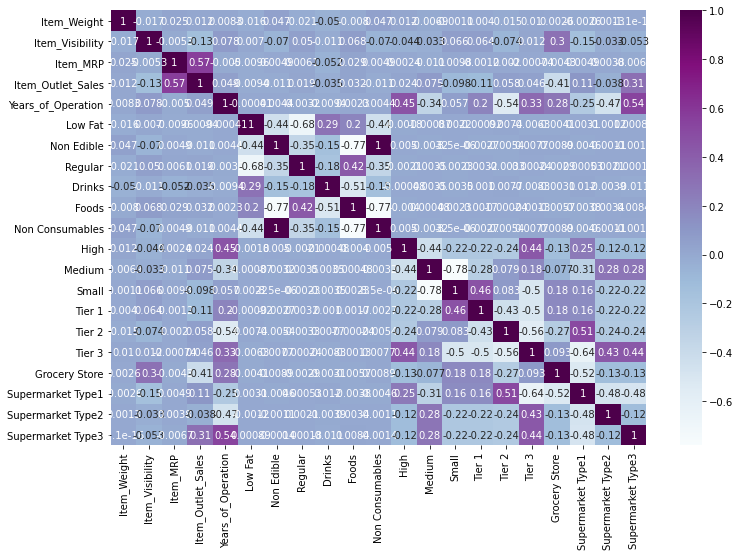

In [43]:
fig=plt.figure(figsize=(12,8))
hc=df1.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="BuPu")

In [44]:
corr_matrix = df1.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales     1.000000
Item_MRP              0.567574
Supermarket Type3     0.311192
Supermarket Type1     0.108765
Medium                0.075154
Tier 2                0.058261
Years_of_Operation    0.049135
Tier 3                0.046376
Foods                 0.031905
High                  0.024170
Regular               0.018719
Item_Weight           0.011550
Low Fat              -0.009438
Non Edible           -0.010861
Non Consumables      -0.010861
Drinks               -0.034672
Supermarket Type2    -0.038059
Small                -0.098403
Tier 1               -0.111287
Item_Visibility      -0.134138
Grocery Store        -0.411727
Name: Item_Outlet_Sales, dtype: float64

### Observation:-
1. Item_Identifier has near zero correlation with Item_Outlet_Sales, hence we can delete this column.
2. Item_MRP, Outlat_Type and Outlet_Identifier has strong positive correlation with  Outlet_Identifier.
3. Item_Visibility, Outlet_Size  has week correlation with Item_Outlet_Sales.

In [45]:
#df1.drop(columns=['Item_Identifier'],inplace=True)
#df2.drop(columns=['Item_Identifier'],inplace=True)

In [46]:
x=df1.drop(['Item_Outlet_Sales'],axis=1)
y=df1['Item_Outlet_Sales']
x_test1=df2

In [47]:
y

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
5         556.6088
6         343.5528
7        4022.7636
8        1076.5986
9        4710.5350
10       1516.0266
11       2187.1530
12       1589.2646
13       2145.2076
14       1977.4260
15       1547.3192
16       1621.8888
17        718.3982
18       2303.6680
19       2748.4224
20       3775.0860
21       4064.0432
22       1587.2672
23        214.3876
24       4078.0250
25        838.9080
26       1065.2800
27        308.9312
28        178.4344
29        125.8362
30        163.7868
31       2741.7644
32       3068.0064
33       2174.5028
34       2085.2856
35       3791.0652
36       2797.6916
37       1609.9044
38        388.1614
39       2180.4950
40       3435.5280
41       2150.5340
42       2527.3768
43       6768.5228
44        373.5138
45        358.2004
46       2428.8384
47       5815.0972
48       2576.6460
49        780.3176
50       3134.5864
51        850.8924
52        81

In [48]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.42,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = r2_score(y_test, LR.predict(x_test))
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.581092799603484 on Random_state 158


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.42,random_state=158)


In [50]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (4943, 20)
y_train: (4943,)
x_test: (3580, 20)
y_test: (3580,)


### Linear Regression Model

In [51]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
#predict the value
y_pred = lm.predict(x_test)
print("Accurecy Score",round(lm.score(x_train,y_train)* 100,2))
print("R2 Score", r2_score(y_test, y_pred))
print("Cross Val Score", cross_val_score(lm, x_test, y_test, cv=5).mean())

Accurecy Score 54.7
R2 Score 0.581092799603484
Cross Val Score 0.5818237876856578


In [52]:
print('error:')
print('Mean absolute error', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:', mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error 836.8510394182866
Mean Squared error: 1279118.3413441642
Root Mean Squared Error: 1130.9811410205584


### Lasso

In [53]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=.001)
#ls=lasso(alpha=1.0) #default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5470136396013079

In [54]:
ls.coef_

array([    4.11346783,   -90.1504583 ,    15.07455335,   -35.64768337,
         -33.7801148 ,   -16.3646866 ,    10.58059481,    -5.31545192,
           3.42762504,    -0.        ,   775.40117699,   -37.3335337 ,
           7.74056685,   375.04271427,   123.94940376,   -52.15525439,
       -2242.15524928,  -715.33764667, -1025.94811476,  1537.67120592])

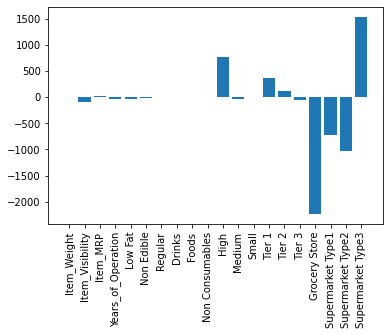

In [55]:
plt.bar(x.columns,ls.coef_)
plt.xticks(rotation='vertical')
plt.show()

### Ridge

In [56]:
#try to minimize the coeefocoent variance 
rd = Ridge(alpha=.001)
#rd.Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5470136403403785

In [57]:
rd.coef_

array([ 4.11338344e+00, -9.06264040e+01,  1.50745515e+01, -3.56735372e+01,
       -2.15441844e+01, -1.27485180e+00,  2.28190360e+01, -3.73857196e+00,
        5.01342372e+00, -1.27485186e+00,  5.27227911e+02, -2.86165315e+02,
       -2.41062593e+02,  2.26264699e+02, -2.49797978e+01, -2.01284898e+02,
       -1.63063180e+03, -1.04185517e+02, -4.14717884e+02,  2.14953520e+03])

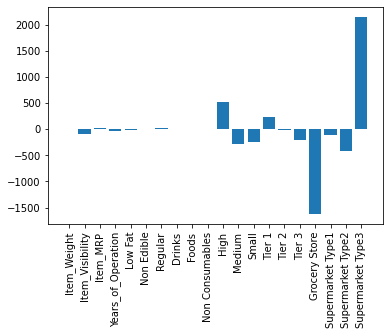

In [58]:
plt.bar(x.columns,rd.coef_)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
#ElasticNet is a combination of both Lasso and Ridge 
from sklearn.linear_model import ElasticNet 
enr=ElasticNet(alpha=.001)
#enr = ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.546920407274109


array([ 4.12904243e+00, -8.26344000e+01,  1.50687568e+01, -2.30020223e+01,
       -2.14774212e+01, -7.94282864e-01,  2.28488680e+01, -3.90944217e+00,
        5.66385659e+00, -8.39476945e-01,  3.19562713e+02, -1.74784350e+02,
       -1.42282208e+02,  1.44819700e+02, -2.93463202e+01, -1.11501872e+02,
       -1.65565354e+03,  3.34921065e+01, -3.14432728e+02,  1.93529593e+03])

### Decision Tree Regressor model

In [66]:
#Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dr.fit(x_train,y_train)
#predict the value
y_pred = dr.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Cross Val Score", cross_val_score(dr, x_test, y_test, cv=5).mean())

R2 Score 0.5519611673083713
Cross Val Score 0.3294423710139581


### Support Vector Regressor


In [67]:
from sklearn.svm import SVR
kernellist=['linear', 'poly', 'rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print("\nSupport Vector Kernel", i)
    print("R2 Score", r2_score(y_test, y_pred))
    print("Cross Val Score", cross_val_score(sv, x_test, y_test, cv=5).mean())


Support Vector Kernel linear
R2 Score 0.5519611673083713
Cross Val Score 0.4262645051603321

Support Vector Kernel poly
R2 Score 0.5519611673083713
Cross Val Score 0.2791105473812353

Support Vector Kernel rbf
R2 Score 0.5519611673083713
Cross Val Score 0.09480555130407495


### Random Forest Model


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Cross Val Score", cross_val_score(rf, x_test, y_test, cv=5).mean())

R2 Score 0.6156364050490082
Cross Val Score 0.610679305491771


In [69]:
res = (y_test - y_pred)

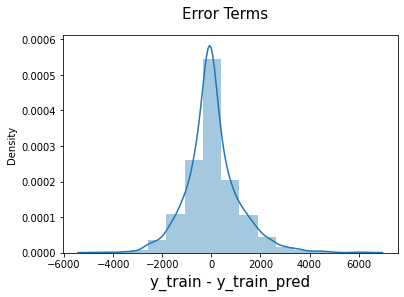

In [70]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [71]:
print('Error:')
print(mean_squared_error(y_pred,y_test))

Error:
1173640.6621357324


### Hyper parameter Tunning Random Forest.

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators":[100,150,200], "criterion":["mse","mae"],
              "max_depth":[25,50],"min_samples_split":[12,18,24]
            ,"max_features":['sqrt','auto'],"min_samples_leaf":[5,6,7,12] }
rf = RandomForestRegressor()
tuning_model=GridSearchCV(rf,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
result=tuning_model.fit(x_train,y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=-1267574.019 total time=   0.3s
[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=-1196800.289 total time=   0.3s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=-1219369.947 total time=   0.3s
[CV 1/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=-1252218.619 total time=   0.5s
[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=-1191678.773 total time=   0.4s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=150;, score=-1221002.

[CV 1/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=200;, score=-1264013.467 total time=   0.6s
[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=200;, score=-1205173.110 total time=   0.8s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=200;, score=-1220413.433 total time=   0.7s
[CV 1/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=100;, score=-1260524.099 total time=   0.4s
[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=100;, score=-1197672.003 total time=   0.4s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=100;, score=-1214318.110 total time=   0.4s
[CV 1/3] END criterion=mse, max_depth=25

[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=150;, score=-1201820.916 total time=   0.4s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=150;, score=-1221173.897 total time=   0.4s
[CV 1/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=200;, score=-1262899.725 total time=   0.6s
[CV 2/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=200;, score=-1212675.787 total time=   0.6s
[CV 3/3] END criterion=mse, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=200;, score=-1221203.404 total time=   0.6s
[CV 1/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=-1240731.073 total time=   1.0s
[CV 2/3] END criterion=mse, max_dep

[CV 3/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=100;, score=-1251853.896 total time=   0.9s
[CV 1/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=150;, score=-1215333.848 total time=   1.4s
[CV 2/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=150;, score=-1137986.013 total time=   1.5s
[CV 3/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=150;, score=-1255930.851 total time=   1.5s
[CV 1/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=200;, score=-1213959.681 total time=   1.9s
[CV 2/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=24, n_estimators=200;, score=-1147586.120 total time=   1.9s
[CV 3/3] END criterion=mse, max_depth=25

[CV 1/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=100;, score=-1200054.618 total time=   0.8s
[CV 2/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=100;, score=-1137788.245 total time=   0.8s
[CV 3/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=100;, score=-1244268.550 total time=   0.8s
[CV 1/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=150;, score=-1203145.612 total time=   1.2s
[CV 2/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=150;, score=-1138362.880 total time=   1.3s
[CV 3/3] END criterion=mse, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=24, n_estimators=150;, score=-1246101.837 total time=   1.3s
[CV 1/3] END criterion=mse, max_de

[CV 2/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=-1186877.236 total time=   0.6s
[CV 3/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=-1212891.602 total time=   0.6s
[CV 1/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=100;, score=-1269568.418 total time=   0.3s
[CV 2/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=100;, score=-1187111.315 total time=   0.3s
[CV 3/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=100;, score=-1219034.598 total time=   0.3s
[CV 1/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=150;, score=-1261212.067 total time=   0.4s
[CV 2/3] END criterion=mse, max_depth=50

[CV 3/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=150;, score=-1221664.056 total time=   0.4s
[CV 1/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=200;, score=-1271556.746 total time=   0.6s
[CV 2/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=200;, score=-1224041.504 total time=   0.6s
[CV 3/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=200;, score=-1221947.461 total time=   0.6s
[CV 1/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=100;, score=-1269975.223 total time=   0.3s
[CV 2/3] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=24, n_estimators=100;, score=-1218010.510 total time=   0.2s
[CV 3/3] END criterion=mse, max_de

[CV 1/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=-1219251.946 total time=   1.4s
[CV 2/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=-1156202.415 total time=   1.5s
[CV 3/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=-1266309.682 total time=   1.4s
[CV 1/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=-1220943.582 total time=   1.8s
[CV 2/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=-1153523.712 total time=   1.9s
[CV 3/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=200;, score=-1260767.316 total time=   2.0s
[CV 1/3] END criterion=mse, max_depth=50

[CV 2/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=100;, score=-1139077.807 total time=   0.9s
[CV 3/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=100;, score=-1245150.870 total time=   0.8s
[CV 1/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=150;, score=-1196299.577 total time=   1.4s
[CV 2/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=150;, score=-1140090.671 total time=   1.3s
[CV 3/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=150;, score=-1235558.244 total time=   1.4s
[CV 1/3] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=12, min_samples_split=18, n_estimators=200;, score=-1203608.950 total time=   1.6s
[CV 2/3] END criterion=mse, max_de

[CV 3/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=-1229555.401 total time=  15.9s
[CV 1/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=-1279220.077 total time=   8.0s
[CV 2/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=-1210037.565 total time=   7.7s
[CV 3/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=-1241777.505 total time=   7.8s
[CV 1/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=-1268792.117 total time=  12.2s
[CV 2/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=18, n_estimators=150;, score=-1241652.070 total time=  11.9s
[CV 3/3] END criterion=mae, max_depth=25

[CV 1/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=200;, score=-1295566.996 total time=  20.1s
[CV 2/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=200;, score=-1253334.624 total time=  17.5s
[CV 3/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=200;, score=-1242813.260 total time=  16.2s
[CV 1/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=100;, score=-1275004.118 total time=   8.4s
[CV 2/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=100;, score=-1255669.586 total time=   7.9s
[CV 3/3] END criterion=mae, max_depth=25, max_features=sqrt, min_samples_leaf=12, min_samples_split=18, n_estimators=100;, score=-1248161.142 total time=   8.4s
[CV 1/3] END criterion=mae, max_de

[CV 2/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=-1172577.901 total time=  51.6s
[CV 3/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=-1268835.585 total time=  54.9s
[CV 1/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=-1220179.577 total time= 1.2min
[CV 2/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=-1164294.785 total time= 1.2min
[CV 3/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=200;, score=-1261559.097 total time= 1.2min
[CV 1/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=18, n_estimators=100;, score=-1218443.944 total time=  33.5s
[CV 2/3] END criterion=mae, max_depth=25

[CV 3/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=100;, score=-1246853.073 total time=  32.9s
[CV 1/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=150;, score=-1202206.419 total time=  47.6s
[CV 2/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=150;, score=-1147311.756 total time=  48.5s
[CV 3/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=150;, score=-1236908.466 total time=  49.5s
[CV 1/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=200;, score=-1202554.031 total time= 1.1min
[CV 2/3] END criterion=mae, max_depth=25, max_features=auto, min_samples_leaf=12, min_samples_split=12, n_estimators=200;, score=-1152791.582 total time= 1.1min
[CV 3/3] END criterion=mae, max_de

[CV 1/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=-1281936.172 total time=   8.0s
[CV 2/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=-1239273.975 total time=   8.1s
[CV 3/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=-1231629.750 total time=   8.3s
[CV 1/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=-1270841.072 total time=  12.0s
[CV 2/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=-1232191.314 total time=  12.5s
[CV 3/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=12, n_estimators=150;, score=-1230064.373 total time=  12.2s
[CV 1/3] END criterion=mae, max_depth=50

[CV 2/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=24, n_estimators=200;, score=-1244530.631 total time=  15.8s
[CV 3/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=7, min_samples_split=24, n_estimators=200;, score=-1242159.588 total time=  15.6s
[CV 1/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=100;, score=-1288506.965 total time=   7.9s
[CV 2/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=100;, score=-1253578.275 total time=   8.0s
[CV 3/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=100;, score=-1250313.141 total time=   7.7s
[CV 1/3] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=12, min_samples_split=12, n_estimators=150;, score=-1291776.297 total time=  11.9s
[CV 2/3] END criterion=mae, max_dept

[CV 3/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=150;, score=-1247534.950 total time=  51.2s
[CV 1/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=200;, score=-1203619.842 total time= 1.1min
[CV 2/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=200;, score=-1151409.165 total time= 1.1min
[CV 3/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=200;, score=-1245446.235 total time= 1.1min
[CV 1/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=-1224279.158 total time=  32.8s
[CV 2/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=12, n_estimators=100;, score=-1166293.557 total time=  49.4s
[CV 3/3] END criterion=mae, max_depth=50

[CV 1/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=150;, score=-1200007.473 total time=  48.7s
[CV 2/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=150;, score=-1153682.179 total time=  49.9s
[CV 3/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=150;, score=-1247207.143 total time=  50.7s
[CV 1/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=200;, score=-1205103.984 total time= 1.1min
[CV 2/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=200;, score=-1154630.306 total time= 1.1min
[CV 3/3] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=7, min_samples_split=24, n_estimators=200;, score=-1241943.567 total time= 1.1min
[CV 1/3] END criterion=mae, max_depth=50

In [106]:
#Best Hyperparameters: {'criterion': 'mse', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 100}
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=12,min_samples_split= 12,max_features= 'auto',max_depth= 50,criterion= 'mse')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("R2 Score", r2_score(y_test, y_pred))
print("Cross Val Score", cross_val_score(rf, x_test, y_test, cv=5).mean())

R2 Score 0.6029212668555316
Cross Val Score 0.6088633379250741


### Hyper Paramter tuning gave us best accuracy score. with default parameter R2 score and accuracy was 2% less

### K Nearest neighbors Regressor model

In [422]:
from sklearn import neighbors as knn
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [423]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = knn.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1596.653850383694
RMSE value for k=  2 is: 1392.1000341030754
RMSE value for k=  3 is: 1326.3196634623555
RMSE value for k=  4 is: 1280.5222178480985
RMSE value for k=  5 is: 1271.8365389513806
RMSE value for k=  6 is: 1269.8219853112284
RMSE value for k=  7 is: 1265.347440676505
RMSE value for k=  8 is: 1264.649887845652
RMSE value for k=  9 is: 1272.1418186135713
RMSE value for k=  10 is: 1273.8040724977081
RMSE value for k=  11 is: 1281.5990793136643
RMSE value for k=  12 is: 1289.410965585042
RMSE value for k=  13 is: 1296.227903625566
RMSE value for k=  14 is: 1300.2171522279102
RMSE value for k=  15 is: 1307.2762045217326
RMSE value for k=  16 is: 1312.4565687775553
RMSE value for k=  17 is: 1318.739677654436
RMSE value for k=  18 is: 1324.9980929219985
RMSE value for k=  19 is: 1328.301124068488
RMSE value for k=  20 is: 1332.6056726022412


### Hyper parameter tuning for KNN Model

In [424]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

kn = knn.KNeighborsRegressor()

model = GridSearchCV(kn, params, cv=5)
result = model.fit(x_train,y_train)
#y_pred = rf.predict(x_test)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.42613094201262375
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


### Calling KNN with best parameters.

In [425]:
kn = neighbors.KNeighborsRegressor(n_neighbors = 9, algorithm= 'auto', weights= 'distance')
kn.fit(x_train, y_train)  #fit the model
pred=kn.predict(x_test) #make prediction on test set
print("R2 Score", r2_score(y_test, y_pred))
print("Cross Val Score", cross_val_score(kn, x_test, y_test, cv=5).mean())

R2 Score 0.5519611673083713
Cross Val Score 0.43300379466130645


# Best Model is Random forest regressor.



#### Predict sales price for test data

In [434]:
y_pred = rf.predict(x_test1)

In [436]:
y_pred.shape

(5681,)

### Saving best model

In [441]:
import joblib 
joblib.dump(rf,'BigMart_Sales_prediction.pki')

['BigMart_Sales_prediction.pki']

In [442]:
model = joblib.load('BigMart_Sales_prediction.pki')

In [444]:
prediction = model.predict(x_test1)
prediction = pd.DataFrame(prediction)
prediction.to_csv('Result.csv')